# Big Picture

### Goal of this model
The main goal of working with this dataset is to predict whether I like a spotify song or not. The dataset has some features that constitutes to the prediction. Also the target label for this dataset is 1 and 0, which means that if my model predicts 1 means I like the song as well as if the model predicts 0, I dont like the song. In this exercise, I will run several classification models, most specifically ensemble classifiers to achieve this goal. My goal is to get an accuracy of at least 88% with this dataset.

#### What is hard voting? 

A hard voting classifier just counts the votes of each classifier in the ensemble and picks the class that gets the most votes.

#### How does it differ from soft voting?

A soft voting classifier computes the average estimated class probability for each class and picks the class with the highest probability.

# Get the Data

In [49]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from math import sqrt

URL: https://www.kaggle.com/geomack/spotifyclassification

In [50]:
#Load dataset and view some basic statictics
data = pd.read_csv('C:/Users/Eugene/Downloads/data.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [51]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [52]:
# Size of the dataset
import os
getSize = os.path.getsize('C:/Users/Eugene/Downloads/data.csv')
print("Size of the dataset: {0:.3} MB" .format(getSize/1048576))

Size of the dataset: 0.212 MB


#### Write a paragraph explaining why you pick this dataset.
I picked this dataset because I am working on a classification model using emsemble and this dataset is also interesting to use to build these model. The main goal of this dataset is to predict whether or not if I like a song. I had few attributes and just one class label. This would work really good for my model building.
#### How big is your dataset? (in terms of MB)
Size of the dataset: 0.212 MB
#### How many entries does it have?
2017 entries
#### How many features does it have?
17 columns
#### What are some basic statistics you can learn right away about this dataset?
The basic statistics I can learn right away from the dataset is that the loudness attribute columns has mostly if not all negative values. I am wondering how this will affect the model or how the correlation will be against the class label (target). Also, from the statistics above, there are no null values in the dataset

In [53]:
# Dropping unreleveent features ( unnamed: 0, song_title and artist )
data = data.loc[: , 'acousticness': 'target']
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [54]:
# How much of your data is missing?
data.isnull().sum().sort_values(ascending=False)

target              0
valence             0
time_signature      0
tempo               0
speechiness         0
mode                0
loudness            0
liveness            0
key                 0
instrumentalness    0
energy              0
duration_ms         0
danceability        0
acousticness        0
dtype: int64

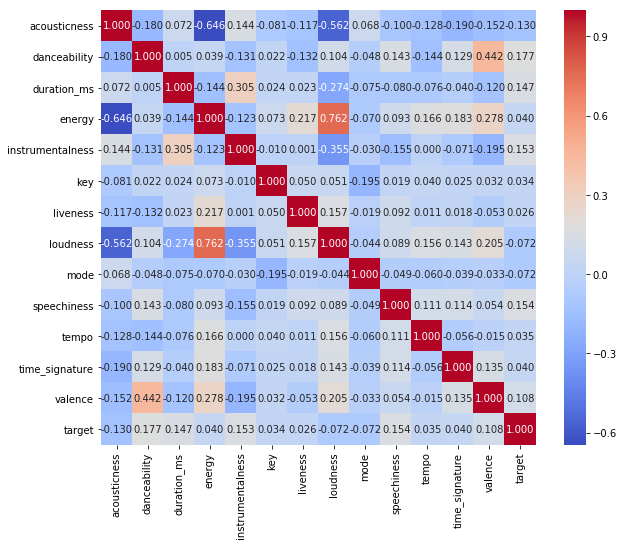

In [55]:
#correlation among the features
features= list(data.columns)
corr = data[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= features, yticklabels= features,
           cmap= 'coolwarm') 

# Non-linear Separation Visualization

In [56]:
# Columns of the dataset
data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

### Discover and plot out all features among the features

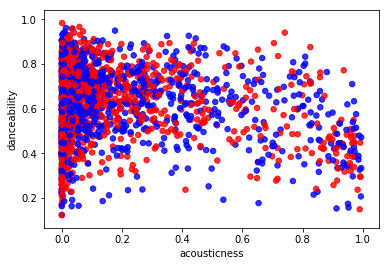

In [57]:
data.plot(kind='scatter', x='acousticness', y='danceability', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

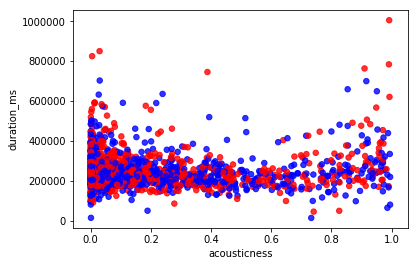

In [58]:
data.plot(kind='scatter', x='acousticness', y='duration_ms', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

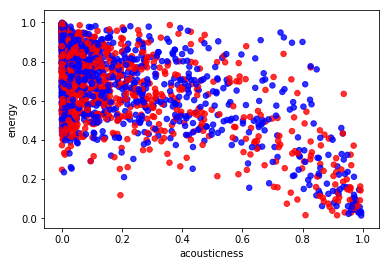

In [59]:
data.plot(kind='scatter', x='acousticness', y='energy', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

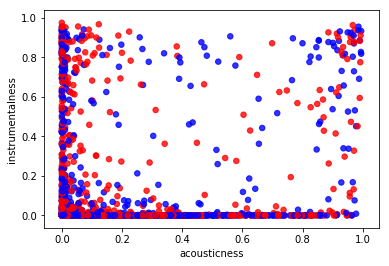

In [60]:
data.plot(kind='scatter', x='acousticness', y='instrumentalness', color = ['blue', 'red'], 
             alpha=0.8, s=30)
plt.show()

##### Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0A2BE87B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F0AA13CB70>]], dtype=object)

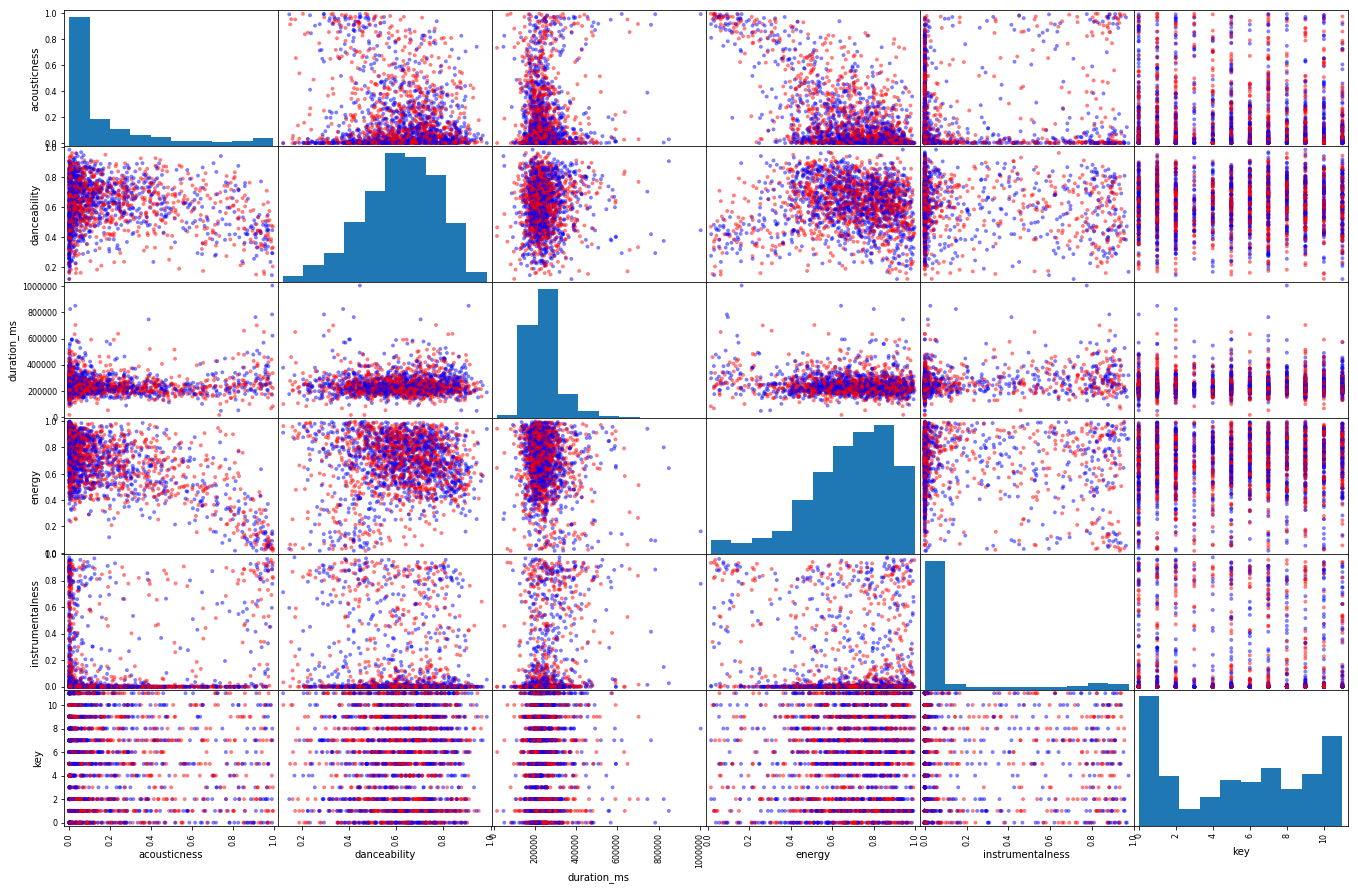

In [61]:
from pandas.plotting import scatter_matrix
scatt = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key']
scatter_matrix(data[scatt], figsize=(23, 15), color = ['red', 'blue'], s=60)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0AABC4FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F0ACC7F278>]], dtype=object)

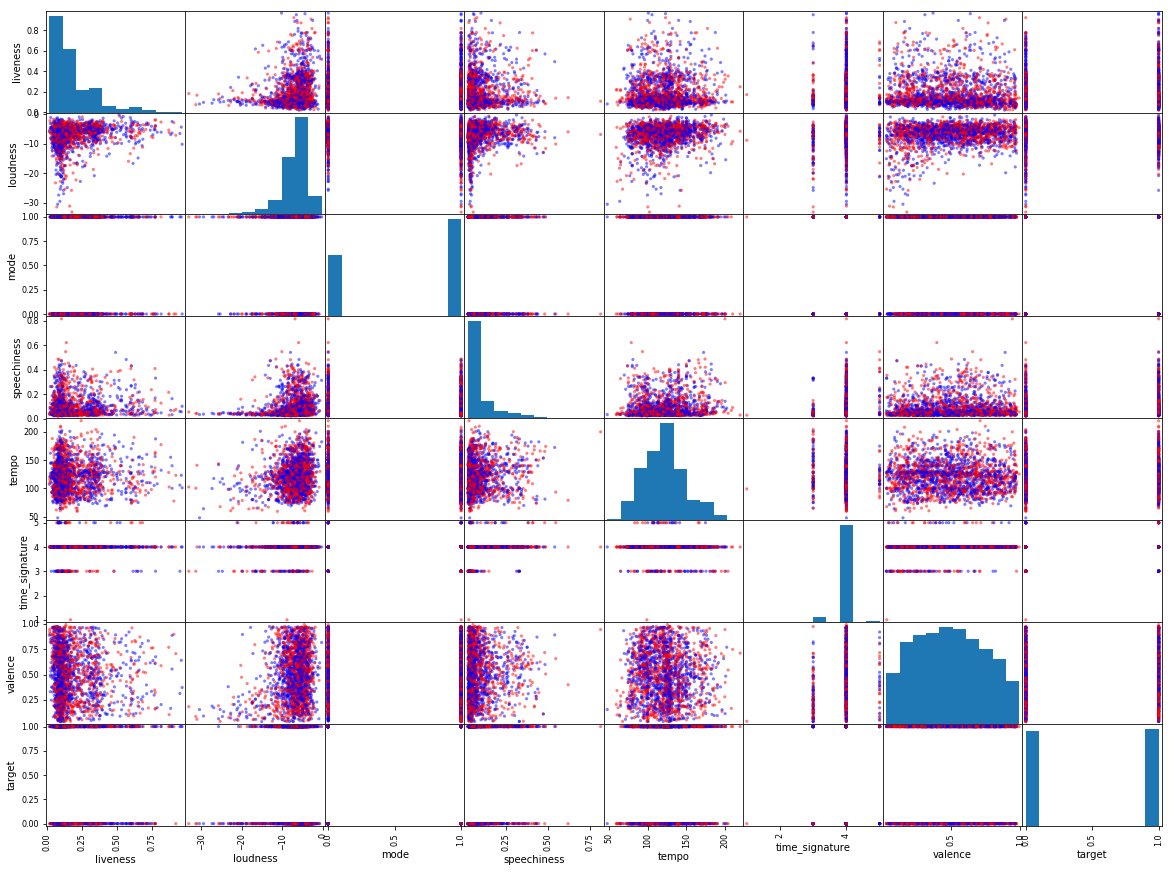

In [62]:
from pandas.plotting import scatter_matrix
scatt = ['liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence', 'target']
scatter_matrix(data[scatt], figsize=(20, 15), color = ['red', 'blue'], s=40)

#### Is there any non-linearly separation among the classes in your dataset?
There is non-linearly seperation among the classes of my dataset. In the scattered plot diagram below you can conclude that no linear marginary line can be draw to seperate both classes from each other. Hence, this shows that my dataset is a non-linearly seperable dataset.

### Preparation of Dataset

##### Seperating features from class label

##### Features 

In [63]:
X = data.loc[:, 'acousticness' : 'valence']
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


##### Target label

In [64]:
y = data.loc[:, 'target':]
y.head()

,target
0,1
1,1
2,1
3,1
4,1


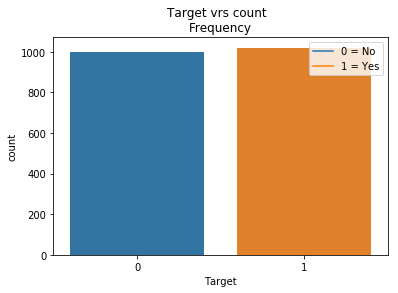

In [65]:
# Plot out frequency of the target label
import matplotlib.text
sns.countplot(data['target'])
plt.plot(0, label ="0 = No")
plt.plot(1, label ="1 = Yes")
plt.xlabel("Target")
plt.ylabel("count")
plt.title("Target vrs count  \nFrequency")
plt.legend()
plt.show()


In [66]:
# Take a look at the outcome variable: 'target'
print(y['target'].value_counts())

1    1020
0     997
Name: target, dtype: int64


### Splitting Dataset in train and test set

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [68]:
# checking for the shapes of the split
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1351, 13)
(666, 13)
(1351, 1)
(666, 1)


# Select a base classifier

### Decision tree base classifier selected

In [69]:
# Selecting and fitting the model
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42, max_features=5)
dt_classifier = dt_classifier.fit(train_X, train_y)

In [70]:
# Predictiong against the test set using decision tree
predict_dt_y = dt_classifier.predict(test_X)

In [71]:
# Print prediction
print(predict_dt_y)

[1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 

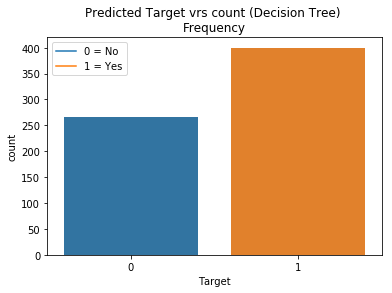

In [72]:
# Plot out frequency of the prediction
sns.countplot(predict_dt_y)
plt.plot(0, label ="0 = No")
plt.plot(1, label ="1 = Yes")
plt.xlabel("Target")
plt.ylabel("count")
plt.title("Predicted Target vrs count (Decision Tree) \nFrequency")
plt.legend()
plt.show()

In [73]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dt_classifier, out_file=None, feature_names=X.columns, rounded=True,
                    filled=True, impurity=False))
graph.format = 'png'

In [74]:
# Will automatically open decision tree. Just incase the tree does not show in the notebook.
graph.render('dt',view=True)

'dt.png'

##### Run the cell below to display the decision tree

![](dt.png)

In [75]:
# F1-Score of the Decision tree
from sklearn.metrics import precision_score, recall_score, f1_score
print("F1-Score Decision Tree:  {0:.3%} ".format(f1_score(test_y, predict_dt_y)))

F1-Score Decision Tree:  74.324% 


# Select a few options of ensemble classifiers (must include Bagging, Random Forest, and Adaboost) train them, and find multiple performance measures of the model

### Random Forest Classifier Selected

In [76]:
#Random Forest Classifier
#Fitting classifier to the Random Forest tree Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=100, max_depth=8)
rf_classifier.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
# # Predictiong against the test set using random forest
predict_rf_y = rf_classifier.predict(test_X)

In [78]:
# Printing the prediction of the random forest
print(predict_rf_y)

[1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 1 1 0 

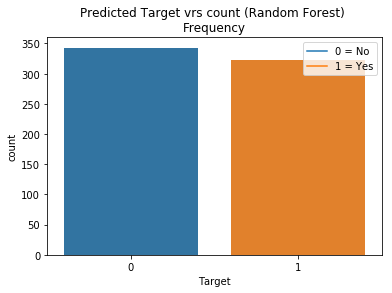

In [79]:
# Plot frequency of the random forest prediction
sns.countplot(predict_rf_y)
plt.plot(0, label ="0 = No")
plt.plot(1, label ="1 = Yes")
plt.xlabel("Target")
plt.ylabel("count")
plt.title("Predicted Target vrs count (Random Forest) \nFrequency")
plt.legend()
plt.show()

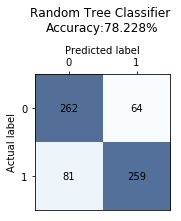

In [80]:
# Making the Confusion Matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, predict_rf_y)

from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_rf, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Random Tree Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_rf_y)))
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,
            s=cm_rf[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [81]:
#Precision and recall, F1-score for RandomForestClassifier Tree
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Random Forest Tree: {0:.3%} ".format(precision_score(test_y, predict_rf_y)))
print ("Recall Random Forest Tree:    {0:.3%} ".format(recall_score(test_y, predict_rf_y)))
print("F1-Score Random Forest Tree:  {0:.3%} ".format(f1_score(test_y, predict_rf_y)))

Precision Random Forest Tree: 80.186% 
Recall Random Forest Tree:    76.176% 
F1-Score Random Forest Tree:  78.130% 


##### Plotting ROC Curve for Random Forest

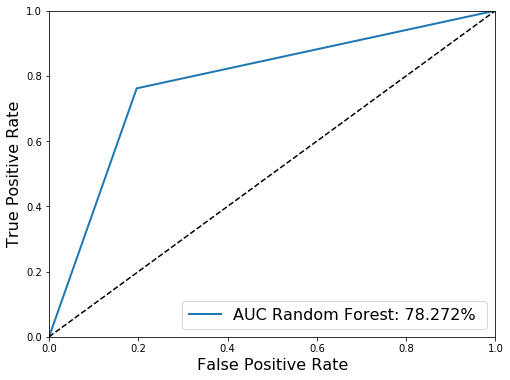

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_forest,tpr_forest, thresholds = roc_curve(test_y, predict_rf_y)

def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)
                                                                                            ))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

### Bagging Classifier Selected

In [83]:
# Training the bagging model and fitting it to the train X and y
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42, max_features=5),
                            n_estimators=500, max_samples=100, random_state=0 )
bag_clf.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [84]:
# Predict against the test set (Bagging classifier)
predict_bg_y = bag_clf.predict(test_X)
predict_bg_y

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0,

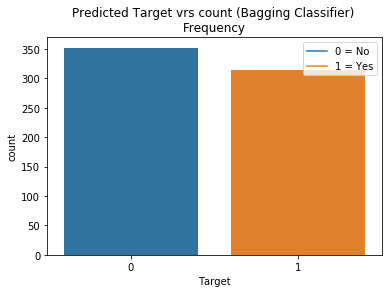

In [85]:
# Plotting Frequency of the Bagging prediction
sns.countplot(predict_bg_y)
plt.plot(0, label ="0 = No")
plt.plot(1, label ="1 = Yes")
plt.xlabel("Target")
plt.ylabel("count")
plt.title("Predicted Target vrs count (Bagging Classifier) \nFrequency")
plt.legend()
plt.show()

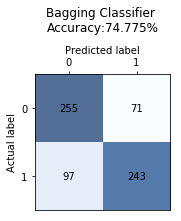

In [86]:
# Making the Confusion Matrix for RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm_bg = confusion_matrix(test_y, predict_bg_y)


from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_bg, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Bagging Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_bg_y)))
for i in range(cm_bg.shape[0]):
    for j in range(cm_bg.shape[1]):
        ax.text(x=j, y=i,
            s=cm_bg[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [87]:
#Precision and recall, F1-score for Bagging Classifier
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Bagging Classifier: {0:.3%} ".format(precision_score(test_y, predict_bg_y)))
print ("Recall Bagging Classifier:    {0:.3%} ".format(recall_score(test_y, predict_bg_y)))
print("F1-Score Bagging Classifier:  {0:.3%} ".format(f1_score(test_y, predict_bg_y)))

Precision Bagging Classifier: 77.389% 
Recall Bagging Classifier:    71.471% 
F1-Score Bagging Classifier:  74.312% 


##### Plotting ROC curve for bagging classifier

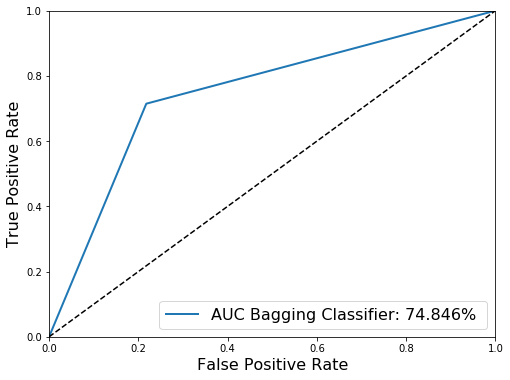

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_bg, tpr_bg, thresholds= roc_curve(test_y, predict_bg_y)

def plot_roc_curve(fpr_bg, tpr_bg, label=None):
    plt.plot(fpr_bg, tpr_bg, linewidth=2, label="AUC Bagging Classifier: {0:.3%} ".format(roc_auc_score(test_y, predict_bg_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_bg, tpr_bg)
plt.show()

### Adaboost Classifier Selected

In [89]:
# Training the AdaBoost model and fitting it to the train X and y
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200, algorithm="SAMME.R", learning_rate=0.7)
ada_clf.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.7, n_estimators=200, random_state=None)

In [90]:
# Predict against the test set
predict_ada_y = ada_clf.predict(test_X)
predict_ada_y

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0,

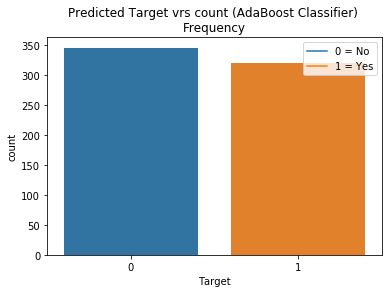

In [91]:
# Plotting the frequency of the prediction
sns.countplot(predict_ada_y)
plt.plot(0, label ="0 = No")
plt.plot(1, label ="1 = Yes")
plt.xlabel("Target")
plt.ylabel("count")
plt.title("Predicted Target vrs count (AdaBoost Classifier) \nFrequency")
plt.legend()
plt.show()

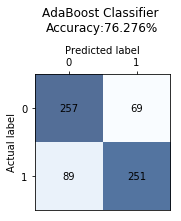

In [92]:
# Making the Confusion Matrix for AdaBoost
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(test_y, predict_ada_y)


from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_ada, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('AdaBoost Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_ada_y)))
for i in range(cm_ada.shape[0]):
    for j in range(cm_ada.shape[1]):
        ax.text(x=j, y=i,
            s=cm_ada[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [93]:
#Precision and recall, F1-score for AdaBoost Classifier
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision AdaBoost Classifier: {0:.3%} ".format(precision_score(test_y, predict_ada_y)))
print ("Recall AdaBoost Classifier:    {0:.3%} ".format(recall_score(test_y, predict_ada_y)))
print("F1-Score AdaBoost Classifier:  {0:.3%} ".format(f1_score(test_y, predict_ada_y)))

Precision AdaBoost Classifier: 78.438% 
Recall AdaBoost Classifier:    73.824% 
F1-Score AdaBoost Classifier:  76.061% 


##### ROC curve for AdaBoost

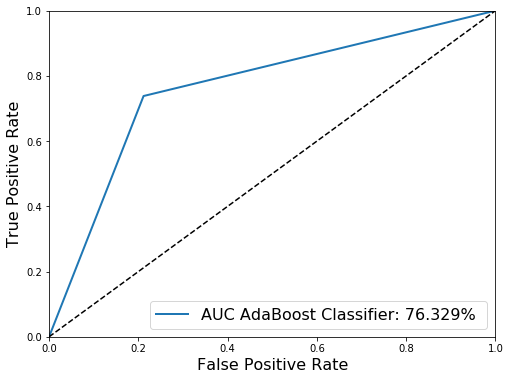

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_ada, tpr_ada, thresholds= roc_curve(test_y, predict_ada_y)

def plot_roc_curve(fpr_ada, tpr_ada, label=None):
    plt.plot(fpr_ada, tpr_ada, linewidth=2, label="AUC AdaBoost Classifier: {0:.3%} ".format(roc_auc_score(test_y, predict_ada_y)
                                                                                            ))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_ada, tpr_ada)
plt.show()

##### Plot all ROC and AUC together to have a better vIew of their AUC

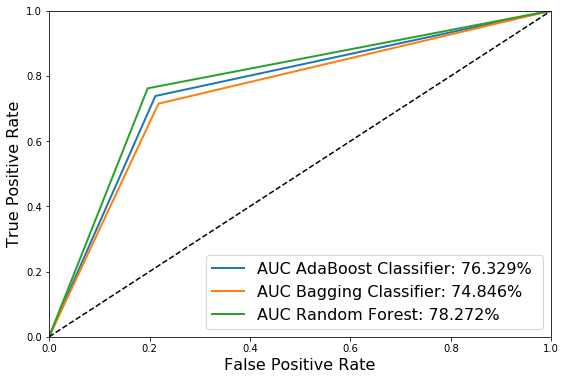

In [95]:
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(9,6))
plt.plot(fpr_ada, tpr_ada, linewidth=2, label="AUC AdaBoost Classifier: {0:.3%} ".format(roc_auc_score(test_y, predict_ada_y)))
plt.plot(fpr_bg, tpr_bg, linewidth=2, label="AUC Bagging Classifier: {0:.3%} ".format(roc_auc_score(test_y, predict_bg_y)))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()

#### Which one yields the best performance measure for your dataset?
Among the emsemble classifiers used, the Random forest seems the have the best performance based on its performance measures. Also, comparing it performance to the base classifier (Decision tree), it seems to perform much better also. Below is the performance scores for the Random Forest.

Precision Random Forest Tree: 80.186% 

Recall Random Forest Tree:    76.176% 

F1-Score Random Forest Tree:  78.130% 

AUC Random Forest:     78.272%


# Rank the Feature Importance of your data

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 1) instrumentalness               0.151028
 2) loudness                       0.122577
 3) speechiness                    0.112994
 4) energy                         0.102768
 5) danceability                   0.100832
 6) duration_ms                    0.098615
 7) acousticness                   0.090786
 8) valence                        0.070332
 9) tempo                          0.065462
10) liveness                       0.047998
11) key                            0.023889
12) mode                           0.008809
13) time_signature                 0.003910


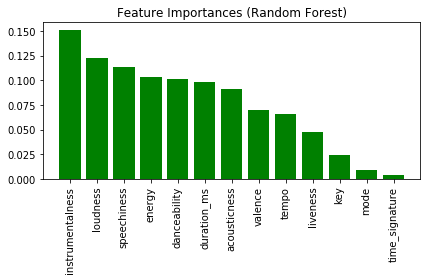

In [96]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = X.columns
forest = RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=500, max_depth=8, n_jobs=-1)
forest.fit(train_X, train_y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(train_X.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

The above feature importance shows that the instrumentalness have a feature importance of about 15% which is very important to the model performance. Also, the mode and the time_signature has a little feature importance which I don't think can affect the model performance if taken out when selecting the features. Having a good feature selection can decide how you model will perform.

# Present your solution

#### How can you pitch your solution to this project?
The only solution I can pitch to this project is to get more data. Without gathering more data, the models accuracy can never be higher. Some features are inrelevant and do not even help in the models performance. I strongly believe if more data is added, the accuracy of the model will improve as well as the precision, recall and F1-score.

#### What did you learn so far about the problem?
I learned that the ensemble classifers are really great for classification. Also, I learned that when using ensemble classifiers, feature importance is very important because having bad features can affect your model performance. Also, I realized that among all the ensemble classifiers, random forest seems to come out as the best.

# Plan for the future of your system

#### Do you need to get more data? If yes, explain how
Yes! I think I need to get more data. The reason is because the correlation among the features and the class label was really poor. That did affect the perfomance of my model a little. I think if I can get more data that can be highly correlated to the class label can help improve my model's performance. I was expecting an accuracy of around 88% after tuning my parameters of the random forest classifer but that was not possible. I strongly believe I can increase this accuracy if I can get a better correlation among my features by getting more data.
#### Does your model work well for the future? If not, which model should be further investigated?
I think the model will work great for the future. None of the other 2 ensemble classifers was close to the random forest. Based on the perfomance score, I am very sure if I get more data to fit the model with, the random forest classfier will be the best model to give great results.
#### Do you satisfy with your system? What do you think needed to improve?
Yes! Am satified with the model but not the performance. I strongly believe the results I had was based on the poor correlation among the features but not the model. I think what needs to be improved is to get more data and also future tunning of the parameters of the Random forest classifier. 